In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp


In [36]:
#src_file = "Fig0459(a)(orig_chest_xray).tif"
src_file = "Fig0121(b)(blown_ic_hr).tif"
#src_file = "gray_lena.tif"

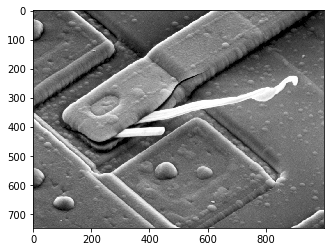

In [37]:
src = cv2.imread(src_file,0)
src2 = cv2.imread(src_file,0)
plt.imshow(src,'gray')

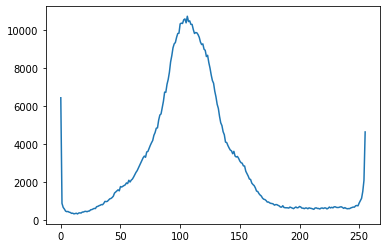

In [38]:
ORG_hist= cv2.calcHist([src],[0],None,[256],[0,256])
plt.plot(ORG_hist)

In [39]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base


In [40]:
img = cv2.imread(src_file,cv2.IMREAD_GRAYSCALE)
original = np.fft.fft2(img)
logic= np.fft.fftshift(original)


In [41]:
k1 =0.5 #원점으로부터 오프셋 제어
k2 = 0.75 # 높은 고역 주파수 기여도 제어

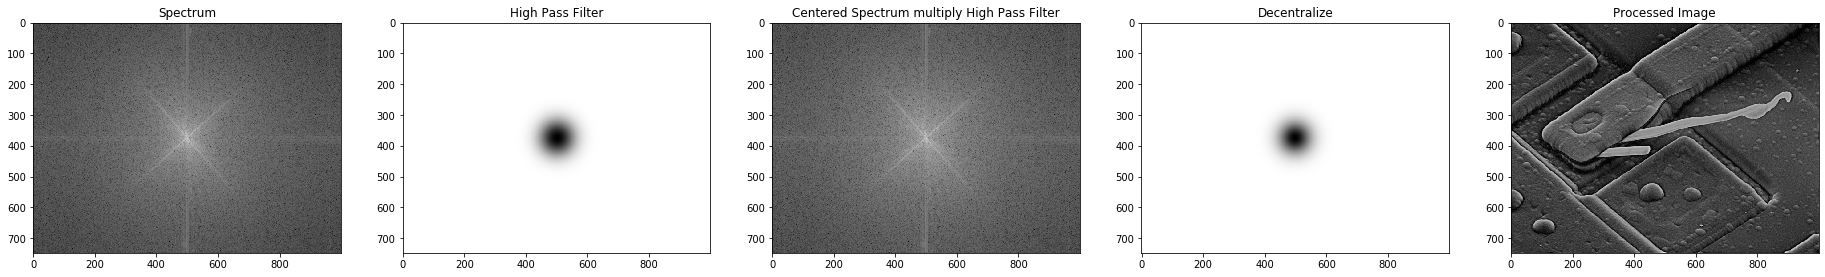

In [42]:

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(logic)), "gray"), plt.title("Spectrum")

HighPass = gaussianHP(40,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = logic*(k1+(k2*HighPass)) #주파수 적용
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")


plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)

plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

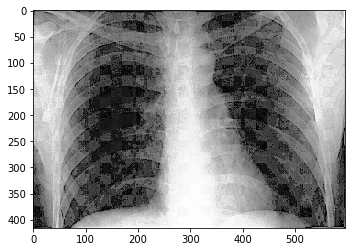

In [43]:
result = np.abs(invHighPass)
result= result.astype('uint8')
result2 =cv2.equalizeHist(result)
plt.imshow(result2,cmap='gray')

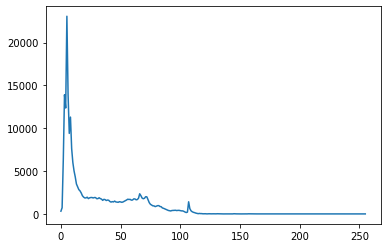

In [44]:
HFE_hist = cv2.calcHist([result],[0],None,[256],[0,256])
plt.plot(HFE_hist)

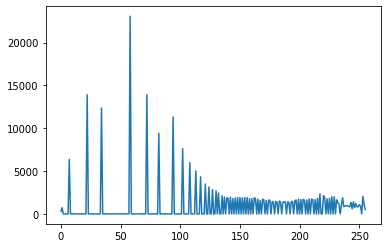

In [45]:
HFE_HE_hist = cv2.calcHist([result2],[0],None,[256],[0,256])
plt.plot(HFE_HE_hist)

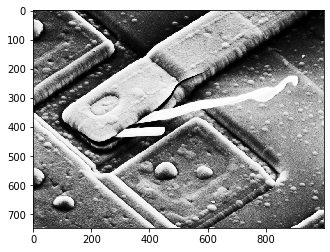

In [46]:
hist = cv2.equalizeHist(src)
plt.imshow(hist,'gray')

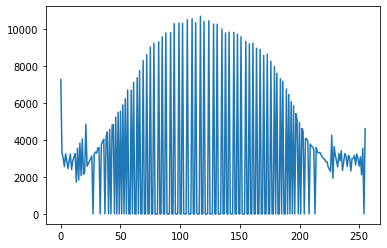

In [47]:
HE_hist= cv2.calcHist([hist],[0],None,[256],[0,256])
plt.plot(HE_hist)

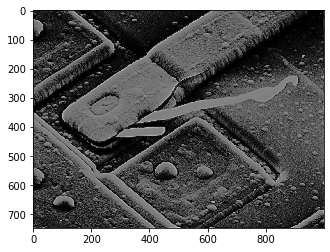

In [48]:
original = np.fft.fft2(hist)
obj = np.fft.fftshift(original)
HighPassCenter2 = obj *(0.5+(0.75*gaussianHP(50,hist.shape)))


HighPass2 = np.fft.ifftshift(HighPassCenter2)
invHighPass2 = np.fft.ifft2(HighPass2)
plt.imshow(np.abs(invHighPass2), "gray")


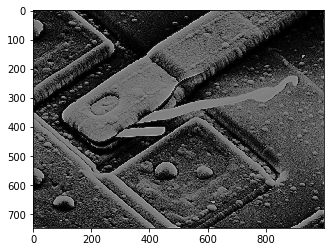

In [49]:
final_hist2 = np.abs(invHighPass2)
final_hist2 = final_hist2.astype('uint8')

plt.imshow(final_hist2,cmap='gray')

In [50]:
HE_HFE_hist= cv2.calcHist([final_hist2],[0],None,[256],[0,256])


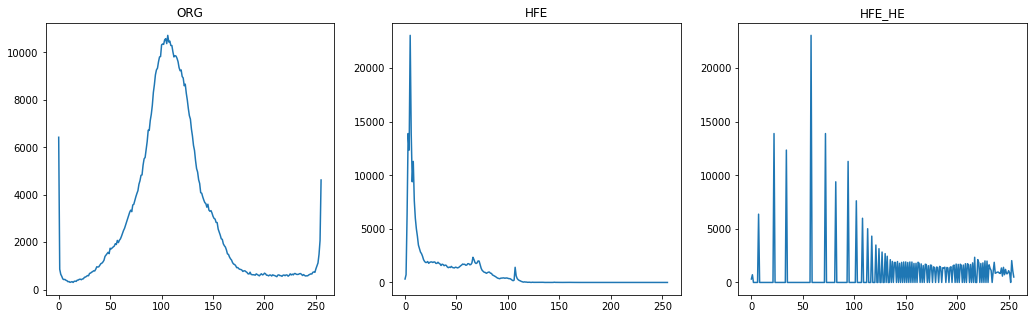

In [51]:

plt.figure(figsize=(30,5), constrained_layout=False)

plt.subplot(151),plt.plot(ORG_hist), plt.title("ORG")

plt.subplot(152), plt.plot(HFE_hist), plt.title("HFE")

plt.subplot(153), plt.plot(HFE_HE_hist), plt.title("HFE_HE")
plt.show()

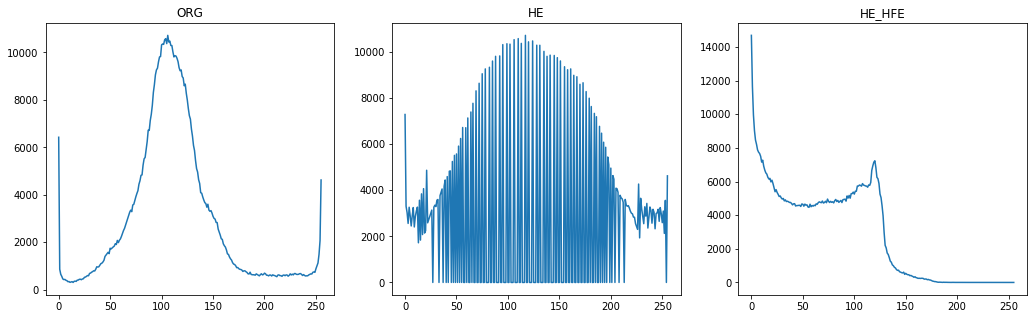

In [52]:

plt.figure(figsize=(30,5), constrained_layout=False)
plt.subplot(151),plt.plot(ORG_hist), plt.title("ORG")

plt.subplot(152),plt.plot(HE_hist), plt.title("HE")

plt.subplot(153), plt.plot(HE_HFE_hist), plt.title("HE_HFE")
plt.show()